In [1]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
local_path = "Elevators_dataset/Elevators dataset/elevators_dataset_large/elevators_dataset_large"

In [3]:
os.listdir(local_path)

['test', 'train']

In [4]:
train_path = os.path.join(local_path, "train")
test_path = os.path.join(local_path, "test")

In [5]:
train_images = os.listdir(train_path)

In [6]:
train_labels = []
for name in train_images:
    if "open" in name:
        train_labels.append(1)
    elif "closed" in name:
        train_labels.append(0)

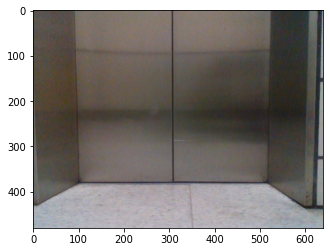

In [7]:
img = cv2.imread(os.path.join(train_path, train_images[0]))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [8]:
train_data = []
for i in range(len(train_images)):
    img_path = os.path.join(train_path, train_images[i])
    img = cv2.imread(img_path, 0)
    img = cv2.resize(img, (256, 256))
    train_data.append(img.flatten())

In [9]:
X = np.array(train_data)
y = np.array(train_labels)

In [10]:
np.unique(y, return_counts=True)

(array([0, 1]), array([500, 500], dtype=int64))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape

((800, 65536), (200, 65536))

In [13]:
scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.fit_transform(X_test)

array([[0.22624434, 0.25438596, 0.15418502, ..., 0.67123288, 0.67699115,
        0.68918919],
       [0.22624434, 0.22807018, 0.23348018, ..., 0.65296804, 0.65044248,
        0.67117117],
       [0.18099548, 0.19736842, 0.14977974, ..., 0.57990868, 0.57964602,
        0.57207207],
       ...,
       [0.08144796, 0.13596491, 0.11894273, ..., 0.60730594, 0.56637168,
        0.61711712],
       [0.31674208, 0.31578947, 0.2907489 , ..., 0.44748858, 0.46902655,
        0.4009009 ],
       [0.35746606, 0.24561404, 0.18061674, ..., 0.52968037, 0.51769912,
        0.50900901]])

In [14]:
model = LGBMClassifier(random_state=42)

In [15]:
model.fit(X_train, y_train)

LGBMClassifier(random_state=42)

In [16]:
preds = model.predict(X_test)

In [17]:
acc = (preds == y_test).sum() / len(y_test) 
acc*100

100.0

In [18]:
y_test

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0])

In [19]:
preds

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0])